In [1]:
import os

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
student_files=[doc for doc in os.listdir() if doc.endswith('.txt')]

In [5]:
student_files

['Blogging website.txt',
 'Note Taking application.txt',
 'Temperature converter.txt',
 'Video conferencing.txt']

In [6]:
student_notes=[open(_file,encoding='utf-8').read() for _file in student_files]

In [7]:
student_notes

['<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="UTF-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n    <link rel="preconnect" href="https://fonts.googleapis.com" />\n    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin />\n    <link\n      href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@800&display=swap"\n      rel="stylesheet"\n    />\n    <link rel="stylesheet" href="style.css" />\n    <script defer src="script.js"></script>\n    <title>My Blogging webpage</title>\n  </head>\n  <body>\n    <div class="modal-container">\n      <div class="modal">\n        <button class="modal__btn"></button>\n        <h2 class="modal__title"></h2>\n        <p class="modal__body"></p>\n      </div>\n    </div>\n    <div class="form-container">\n      <h1>Blog Taker</h1>\n      <h3>Add a New Blog:</h3>\n      <form>\n        <label for="title"\n          >Title\n          <input type="text" id="title" placeholder=

In [8]:
def vectorize(text):
    return TfidfVectorizer().fit_transform(text).toarray()

In [9]:
def similarity(doc1,doc2):
    return cosine_similarity([doc1,doc2])

In [10]:
vectors=vectorize(student_notes)

In [11]:
vectors

array([[0.01752508, 0.        , 0.01752508, ..., 0.        , 0.01418806,
        0.        ],
       [0.01653025, 0.        , 0.01653025, ..., 0.        , 0.01338266,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01450719, 0.        , ..., 0.17408632, 0.01851951,
        0.01450719]])

In [12]:
s_vectors=list(zip(student_files,vectors))

In [13]:
s_vectors

[('Blogging website.txt',
  array([0.01752508, 0.        , 0.01752508, 0.        , 0.01752508,
         0.        , 0.03505015, 0.034799  , 0.        , 0.06959801,
         0.        , 0.        , 0.        , 0.01418806, 0.        ,
         0.        , 0.        , 0.        , 0.01418806, 0.        ,
         0.01752508, 0.06959801, 0.        , 0.        , 0.01752508,
         0.        , 0.07094029, 0.01752508, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.01418806, 0.03505015,
         0.        , 0.        , 0.05257523, 0.        , 0.12759634,
         0.        , 0.        , 0.        , 0.        , 0.01752508,
         0.02222834, 0.01752508, 0.        , 0.        , 0.        ,
         0.        , 0.01418806, 0.03505015, 0.03505015, 0.0701003 ,
         0.01752508, 0.04639867, 0.03505015, 0.05257523, 0.        ,
         0.        , 0.        , 0.01752508, 0.03505015, 0.08762538,
         0.        , 0.02319934, 0.        , 0.01418806, 0.03505015,
        

In [14]:
plagiarism_results=set()

In [15]:
 def check_plagiarism():
    plagiarism_results = set()

    for i, (student_a, text_vector_a) in enumerate(s_vectors):
        new_vectors = s_vectors[i+1:]  # Start from the next student to avoid duplicate comparisons

        for student_b, text_vector_b in new_vectors:
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            student_pair = sorted((student_a, student_b))
            score = (student_pair[0], student_pair[1], sim_score)
            plagiarism_results.add(score)

    # Sort the results based on similarity scores (in descending order)
    sorted_results = sorted(plagiarism_results, key=lambda x: x[2], reverse=True)

    return sorted_results
                                     

In [16]:
for result in check_plagiarism():
    student1, student2, sim_score = result
    print(f"Projects: {student1} and {student2} - Similarity Score: {sim_score:.2f}")

Projects: Blogging website.txt and Note Taking application.txt - Similarity Score: 0.96
Projects: Blogging website.txt and Temperature converter.txt - Similarity Score: 0.30
Projects: Note Taking application.txt and Temperature converter.txt - Similarity Score: 0.28
Projects: Blogging website.txt and Video conferencing.txt - Similarity Score: 0.18
Projects: Note Taking application.txt and Video conferencing.txt - Similarity Score: 0.16
Projects: Temperature converter.txt and Video conferencing.txt - Similarity Score: 0.13


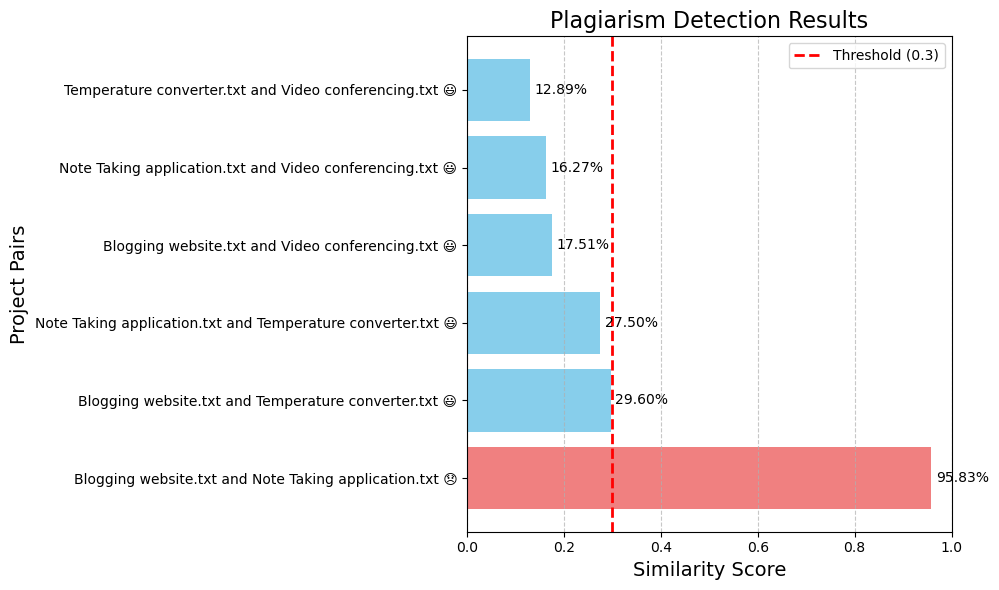

In [17]:
import matplotlib.pyplot as plt

# Call the check_plagiarism function to get the sorted results
results = check_plagiarism()

# Extract data for the bar chart
student_pairs = [(result[0], result[1]) for result in results]
similarity_scores = [result[2] for result in results]

# Define the threshold
threshold = 0.3

# Create a horizontal bar chart with swapped axes
plt.figure(figsize=(10, 6))
bar_colors = ['skyblue' if score <= threshold else 'lightcoral' for score in similarity_scores]

# Define emojis for acceptance and rejection with larger font size
accept_emoji = '😃'  # Happy emoji
reject_emoji = '😞'  # Sad emoji

# Add emojis with larger font size to the labels based on acceptance/rejection
labels_with_emojis = [
    f"{pair[0]} and {pair[1]} {accept_emoji}" if score <= threshold else f"{pair[0]} and {pair[1]} {reject_emoji}"
    for pair, score in zip(student_pairs, similarity_scores)
]

bars = plt.barh(range(len(student_pairs)), similarity_scores, tick_label=labels_with_emojis, color=bar_colors)
plt.ylabel('Project Pairs', fontsize=14)
plt.xlabel('Similarity Score', fontsize=14)
plt.title('Plagiarism Detection Results', fontsize=16)

# Add a red line to indicate the threshold
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})', linewidth=2)

# Add percentage values on the right of each bar
for bar, score in zip(bars, similarity_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.2%}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 1)  # Customize the x-axis limits

# Show the legend
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


In [18]:
# Define the threshold
threshold = 0.3

# Call the check_plagiarism function to get the sorted results
results = check_plagiarism()

# Extract data for the bar chart
student_pairs = [(result[0], result[1]) for result in results]
similarity_scores = [result[2] for result in results]

# Filter student pairs whose projects are rejected
rejected_pairs = [
    (pair[0], pair[1])
    for pair, score in zip(student_pairs, similarity_scores)
    if score > threshold
]

# Print the list of rejected student pairs in a tabular format
print("Rejected Project Pairs:")
print("{:<30} {:<30}".format("Project 1", "Project 2"))
for pair in rejected_pairs:
    print("{:<30} {:<30}".format(pair[0], pair[1]))


Rejected Project Pairs:
Project 1                      Project 2                     
Blogging website.txt           Note Taking application.txt   
